In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.close("all")

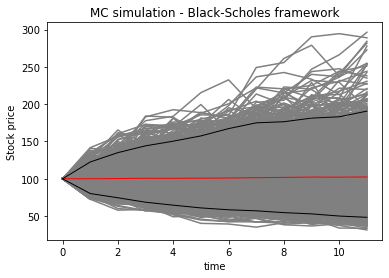

In [29]:
# Euler discretization
######################

# Parameters
M = 2000               # Number of simulations
T = 12                 # Number of periods to simulate
S_t = np.zeros([T, M])
S_t[0, :] = 100        # initial price
sigma = 0.37           # volatility
mu = 0.017             # mean
dt = 1/T               # time increment between 2 points
W_t = np.random.normal(0, 1, [T, M])


for i in range(T-1):
    for j in range(M):
        S_t[i+1, j] = S_t[i, j] * np.exp((mu - (sigma**2)/2)*dt + sigma*np.sqrt(dt)*W_t[i, j])

drift = np.mean(S_t, axis=1)
lower, upper = np.percentile(S_t, [2.5, 97.5], axis=1)

plt.figure(num=1)
plt.plot(S_t, '#808080')
plt.plot(drift, '-r', linewidth=1.0)
plt.plot(lower, '-k', linewidth=1.0)
plt.plot(upper, '-k', linewidth=1.0)
plt.xlabel('time')
plt.ylabel('Stock price')
plt.title('MC simulation - Black-Scholes framework')
plt.show()

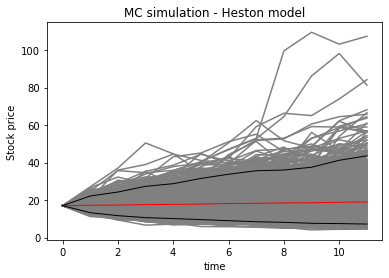

In [30]:
# Heston model
##############

# Parameters
M = 2000     # Number of simulations
T = 12       # Number of periods to simulate
dt = 1/T
sigma = 0.37
mu = 0.017   # Drift of underlying
kappa = 0.9  # Rate at which νt reverts to theta
theta = 0.25 # long run average price variance
rho = -0.8   # Negatively correlated since in bear markets volatility tends to be higher than in bull markets
S0 = 17.0    # Initial price
xi = 0.2

# Initialization
S_t = np.zeros([T, M])
v_t = np.zeros([T, M])
Z_t = np.random.normal(0, 1, [T, M])
Z2 = np.random.normal(0, 1, [T, M])
Z2_t = rho*Z_t + np.sqrt(1-rho**2)*Z2
S_t[0, :] = S0
v_t[0, :] = 0.22

for i in range(T-1):
    for j in range(M):
        S_t[i+1, j] = S_t[i, j] * np.exp((mu - (v_t[i, j]**2)/2)*dt + np.sqrt(v_t[i, j]*dt)*Z_t[i, j])
        v_t[i+1, j] = np.abs(v_t[i, j] + kappa*(theta - v_t[i, j])*dt + xi*np.sqrt(v_t[i, j]*dt)*Z2_t[i, j])
        

drift = np.mean(S_t, axis=1)
lower, upper = np.percentile(S_t, [2.5, 97.5], axis=1)
plt.plot(S_t, '#808080')
plt.plot(drift, '-r', linewidth=1.0)
plt.plot(lower, '-k', linewidth=1.0)
plt.plot(upper, '-k', linewidth=1.0)
plt.xlabel('time')
plt.ylabel('Stock price')
plt.title('MC simulation - Heston model')
plt.show()